<a href="https://www.kaggle.com/code/utkarshx27/affordable-housing-by-town?scriptVersionId=128052375" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/affordable-housing-by-town-2011-2022/Affordable_Housing_by_Town_2011-2022.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/affordable-housing-by-town-2011-2022/Affordable_Housing_by_Town_2011-2022.csv')
df.head()

,Year,Town Code,Town,2010 Census Units,Government Assisted,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units,Percent Affordable
0,2020,1,Andover,1317,18.0,1,32,0,51,3.87
1,2020,2,Ansonia,8148,349.0,764,147,0,1260,15.46
2,2020,3,Ashford,1903,32.0,0,36,0,68,3.57
3,2020,4,Avon,7389,244.0,16,44,0,304,4.11
4,2020,5,Barkhamsted,1589,0.0,6,23,0,29,1.83


In [4]:
df.describe()

,Year,Town Code,2010 Census Units,Government Assisted,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units,Percent Affordable
count,2025.000000,2025.000000,2025.000000,2024.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,2016.502222,84.921481,8802.104691,537.576581,263.554568,165.792593,32.701235,999.359506,6.196923
std,3.454979,48.838316,10447.314222,1339.781673,933.519526,284.399177,124.038899,2522.972459,6.159299
min,2011.000000,1.000000,388.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,43.000000,2306.000000,24.000000,2.000000,18.000000,0.000000,51.000000,2.170000
50%,2017.000000,85.000000,5451.000000,137.000000,7.000000,51.000000,0.000000,220.000000,4.230000
75%,2020.000000,127.000000,10061.000000,377.000000,88.000000,186.000000,17.000000,684.000000,7.730000
max,2022.000000,169.000000,57012.000000,10733.000000,9132.000000,2429.000000,1295.000000,21122.000000,40.760000


In [5]:
df.isnull().sum()

Year                                   0
Town Code                              0
Town                                   0
2010 Census Units                      0
Government Assisted                    1
Tenant Rental Assistance               0
 Single Family CHFA/ USDA Mortgages    0
Deed Restricted Units                  0
Total Assisted Units                   0
Percent Affordable                     0
dtype: int64

In [6]:
df = df.dropna()

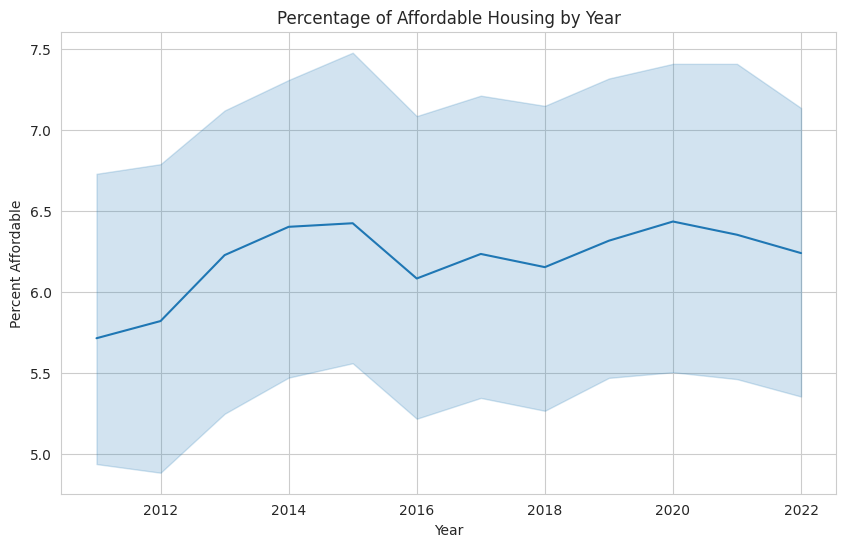

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Percent Affordable')
plt.title('Percentage of Affordable Housing by Year')
plt.xlabel('Year')
plt.ylabel('Percent Affordable')
plt.show()


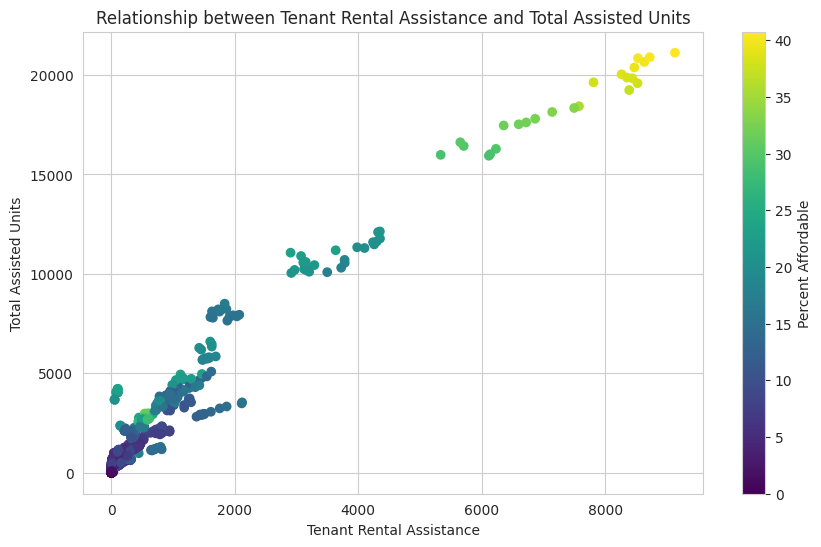

In [8]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(data=df, x='Tenant Rental Assistance', y='Total Assisted Units', c='Percent Affordable', cmap='viridis')
ax.set_title('Relationship between Tenant Rental Assistance and Total Assisted Units')
ax.set_xlabel('Tenant Rental Assistance')
ax.set_ylabel('Total Assisted Units')
cbar = fig.colorbar(scatter)
cbar.ax.set_ylabel('Percent Affordable')
plt.show()


In [9]:
df['Town'].value_counts()

Bolton           13
Andover          12
Oxford           12
Plainfield       12
Plainville       12
                 ..
Southington      11
South Windsor    11
Middlebury       11
Middlefield      11
Chaplin          11
Name: Town, Length: 169, dtype: int64

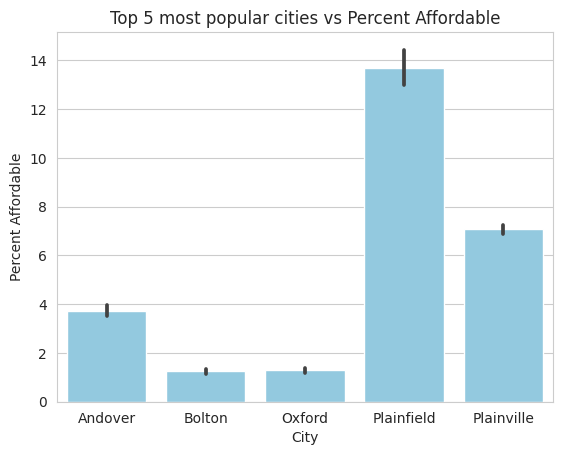

In [10]:
city_counts = df['Town'].value_counts()
top5_cities = city_counts.head()
df_top5 = df[df['Town'].isin(top5_cities.index)]

sns.barplot(x='Town', y='Percent Affordable', data=df_top5, color='skyblue')
plt.title('Top 5 most popular cities vs Percent Affordable')
plt.xlabel('City')
plt.ylabel('Percent Affordable')

plt.show()